# HR ANALYTICS :Job Change of Data Scientists

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load train dataset into Python Environment

In [2]:
data = pd.read_csv("aug_train.csv")

In [3]:
# Display the first few rows of the train dataset
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
# Display the last few rows of the train dataset
data.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0.0


In [5]:
# checking shape of the train data
data.shape

(19158, 14)

In [6]:
data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

**from above the train dataset has 19158 row entries and 14 columns.**

In [8]:
data[['relevent_experience','experience','last_new_job']].sample(15)

,relevent_experience,experience,last_new_job
16630,No relevent experience,6,never
6761,No relevent experience,6,2
11854,Has relevent experience,9,4
7617,Has relevent experience,14,>4
2456,Has relevent experience,14,>4
10230,No relevent experience,16,1
12607,Has relevent experience,>20,>4
10748,Has relevent experience,9,2
4142,No relevent experience,4,1
460,Has relevent experience,>20,>4


In [9]:
data.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [10]:
# basic descriptive statistics view for train data
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [11]:
data.describe(include="all")

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
count,19158.000000,19158,19158.000000,14650,19158,18772,18698,16345,19093,13220,13018,18735,19158.000000,19158.000000
unique,NaN,123,NaN,3,2,3,5,6,22,8,6,6,NaN,NaN
top,NaN,city_103,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,NaN,NaN
freq,NaN,4355,NaN,13221,13792,13817,11598,14492,3286,3083,9817,8040,NaN,NaN
mean,16875.358179,NaN,0.828848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.366896,0.249348
std,9616.292592,NaN,0.123362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.058462,0.432647
min,1.000000,NaN,0.448000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,8554.250000,NaN,0.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,0.000000
50%,16982.500000,NaN,0.903000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,0.000000
75%,25169.750000,NaN,0.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.000000,0.000000


In [12]:
#Performing value counts to categorical values.

In [13]:
data["city"].value_counts()

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

In [14]:
data["major_discipline"].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [15]:
data["gender"].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [16]:
data["relevent_experience"].value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

In [17]:
data["enrolled_university"].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [18]:
data["education_level"].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [19]:
data["major_discipline"].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [20]:
data["company_size"].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [21]:
data["company_type"].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [22]:
data["last_new_job"].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

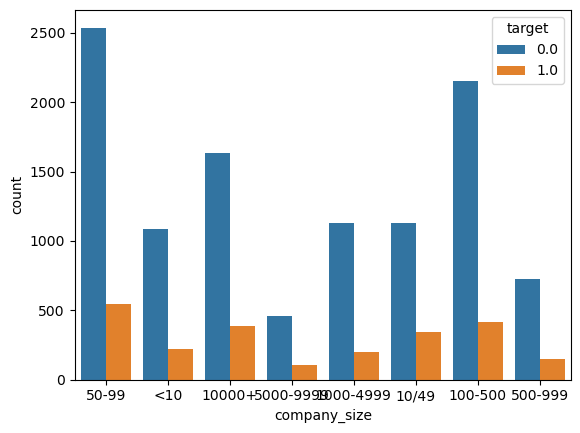

In [23]:
sns.countplot(data=data,x="company_size", hue="target")
plt.savefig("cs_image.png")

In [24]:
#formatting company_size for better use and understanding.
data["company_size"].replace(["<10","10/49", "50-99", "100-500", "500-999", "1000-4999", "5000-9999", "10000+"],
                             ["Startup","Small","Small","Medium","Medium","Large","Large","Large"],inplace=True)


In [25]:
data["company_size"].value_counts()

Small      4554
Large      3910
Medium     3448
Startup    1308
Name: company_size, dtype: int64

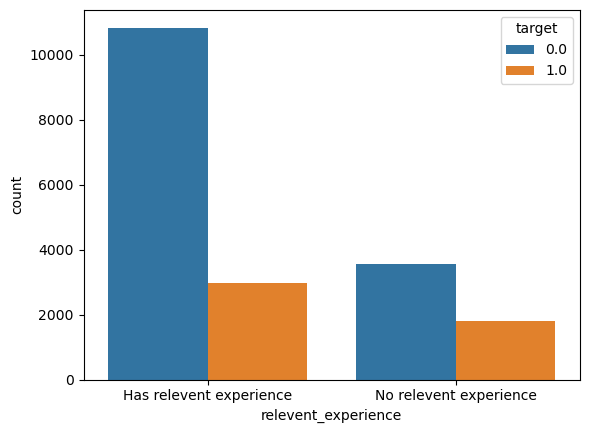

In [26]:
sns.countplot(data=data,x="relevent_experience", hue="target")
plt.savefig("re_image.png")

In [27]:
#formatting relevent_experience for better use and understanding.
data["relevent_experience"].replace(["Has relevent experience", "No relevent experience"],
                             ['Yes','No'],inplace=True)


In [28]:
data["relevent_experience"].value_counts()

Yes    13792
No      5366
Name: relevent_experience, dtype: int64

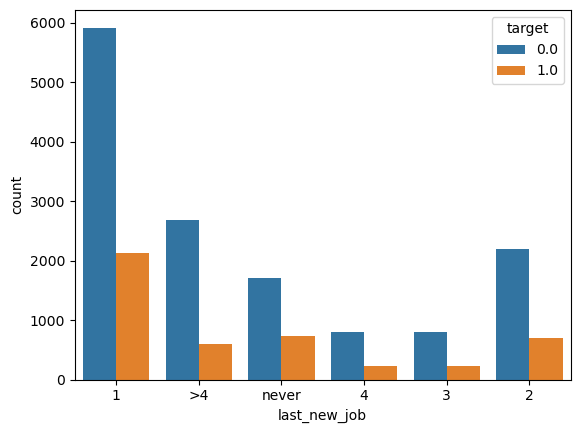

In [29]:
sns.countplot(data=data,x="last_new_job", hue="target")
plt.savefig("job_image.png")

In [30]:
#formatting last_new_job for better use and understanding.
data["last_new_job"].replace(["never"],["0"],inplace=True)

In [31]:
data["last_new_job"].value_counts()

1     8040
>4    3290
2     2900
0     2452
4     1029
3     1024
Name: last_new_job, dtype: int64


# Performing Null Value Detection

In [32]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

**from above some column features has null values.**

# Filling NULL Values

In [33]:
#Performing forward filling and backward filling techniques.
#data["gender"]=data["gender"].fillna(data["gender"].ffill())
#data["company_size"].fillna(data["company_size"].mode()[0],inplace=True)
#data["company_type"].fillna(data["company_type"].mode()[0],inplace=True)

In [34]:
#data["enrolled_university"]=data["enrolled_university"].fillna(data["enrolled_university"].ffill())
#data["education_level"]=data["education_level"].fillna(data["education_level"].ffill())
#data["major_discipline"]=data["major_discipline"].fillna(data["major_discipline"].ffill())
#data["experience"]=data["experience"].fillna(data["experience"].ffill())
#data["last_new_job"]=data["last_new_job"].fillna(data["last_new_job"].ffill())

In [35]:
#data["gender"].fillna(data["gender"].mode()[0], inplace=True)
#data["enrolled_university"].fillna(data["enrolled_university"].mode()[0], inplace=True)
#data["education_level"].fillna(data["education_level"].mode()[0], inplace=True)
#data["major_discipline"].fillna(data["major_discipline"].mode()[0], inplace=True)
#data["experience"].fillna(data["experience"].mode()[0],inplace=True)
#data["company_size"].fillna(data["company_size"].mode()[0], inplace=True)
#data["company_type"].fillna(data["company_type"].mode()[0], inplace=True)
#data["last_new_job"].fillna(data["last_new_job"].mode()[0], inplace=True)

In [36]:
# target: 0 – Not looking for job change, 1 – Looking for a job change
sel_status =data["target"].value_counts()

In [37]:
sel_status

0.0    14381
1.0     4777
Name: target, dtype: int64

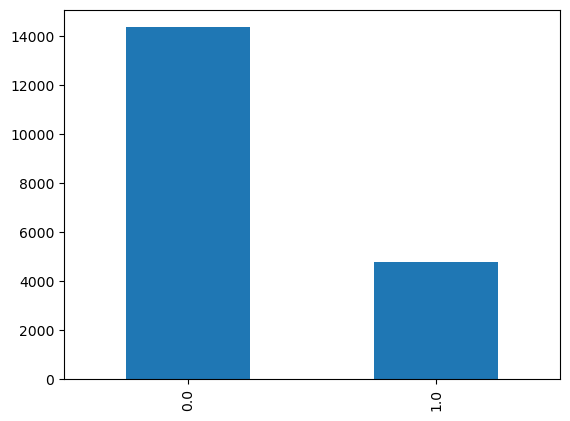

In [38]:
#Target Variable
data['target'].value_counts().plot.bar()
plt.savefig("target_image.png")

**The data is imbalanced. most of the candidates/employee wants to work with the company .**

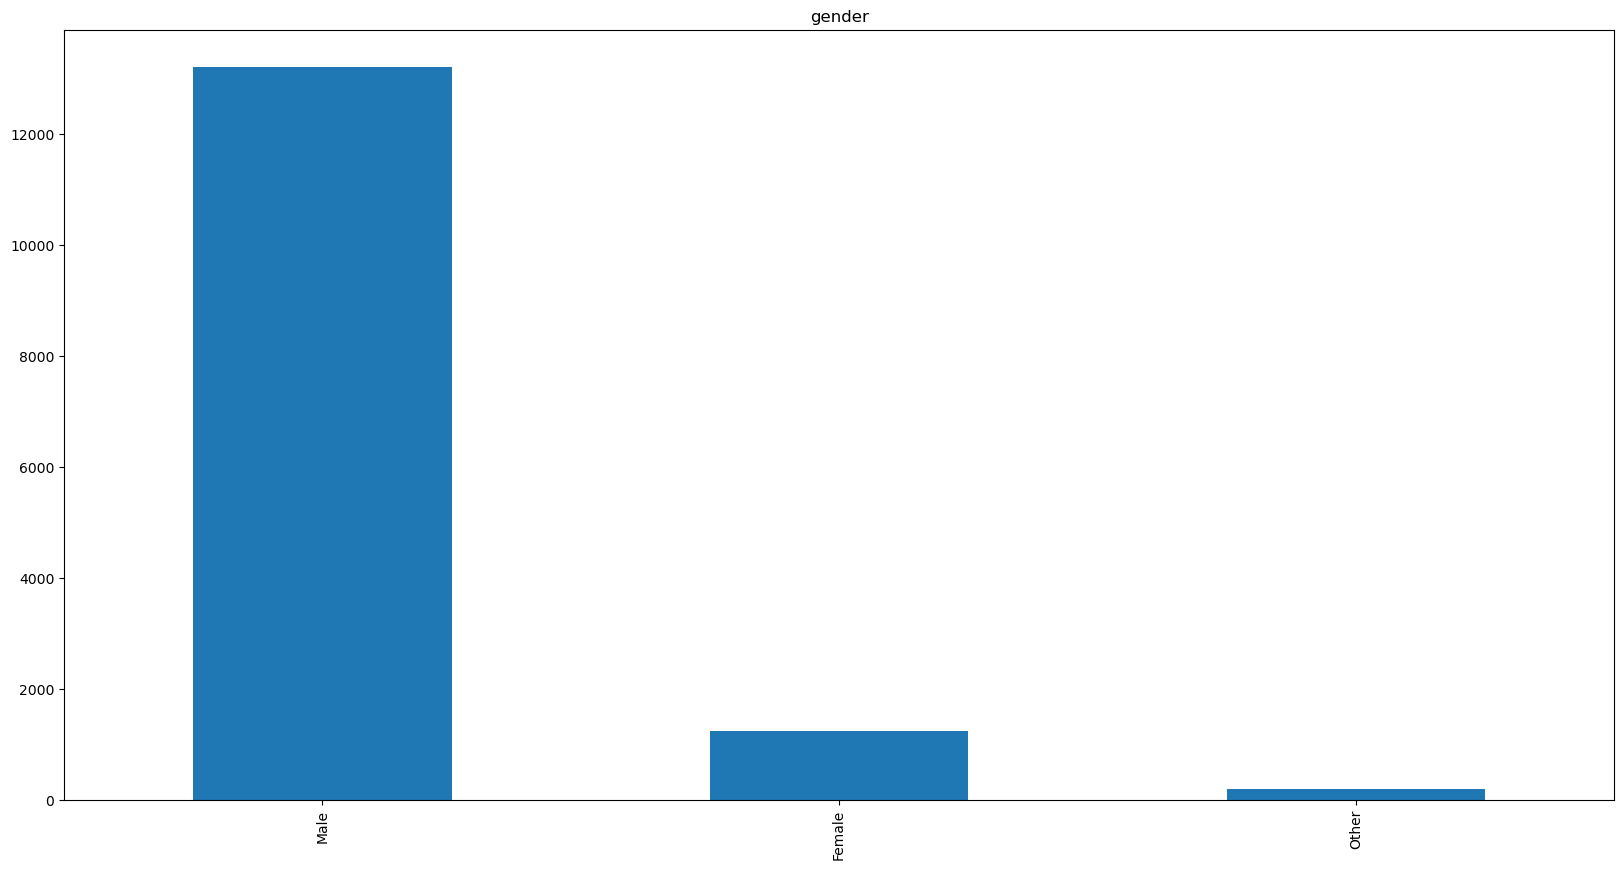

In [39]:
data["gender"].value_counts().plot.bar(figsize=(20,10), title= "gender") 
plt.savefig("gender_image.png")
plt.show()

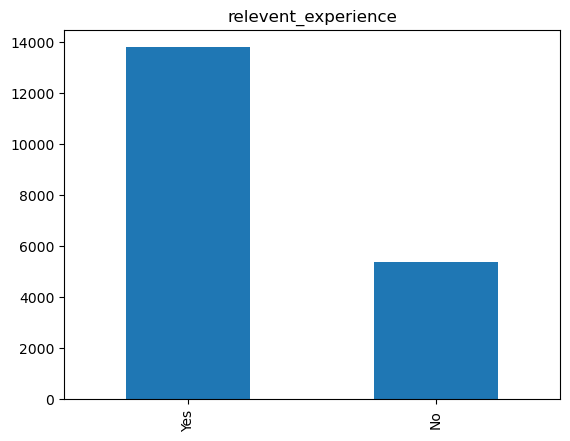

In [40]:
data['relevent_experience'].value_counts().plot.bar(title= "relevent_experience") 
plt.savefig("graph8_image.png")
plt.show()

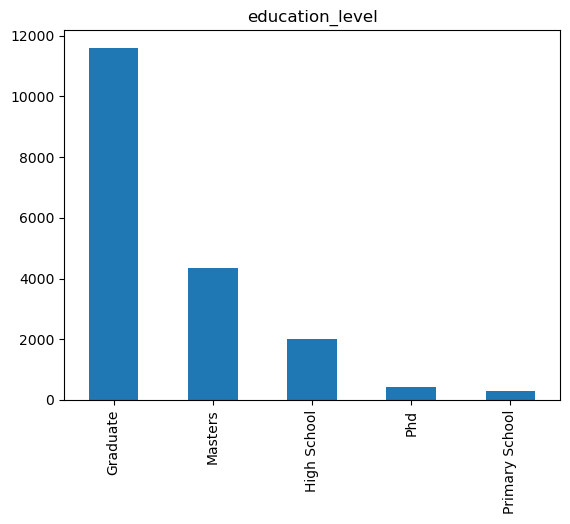

In [41]:
data["education_level"].value_counts().plot.bar(title= "education_level") 
plt.savefig("graph7_image.png")
plt.show()

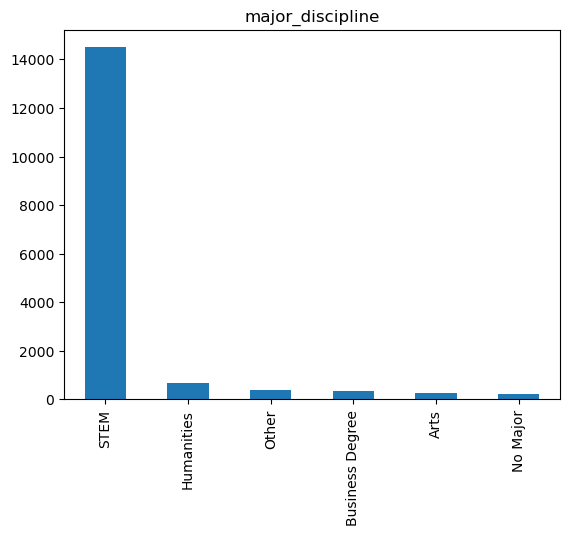

In [42]:
data["major_discipline"].value_counts().plot.bar(title="major_discipline") 
plt.savefig("graph6_image.png")
plt.show()

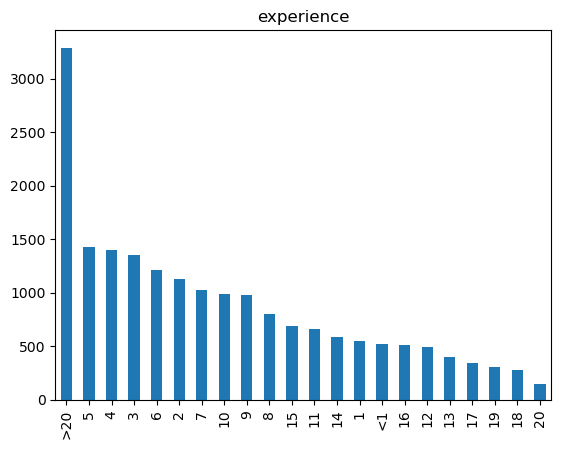

In [43]:
data["experience"].value_counts().plot.bar(title="experience") 
plt.savefig("graph5_image.png")
plt.show()

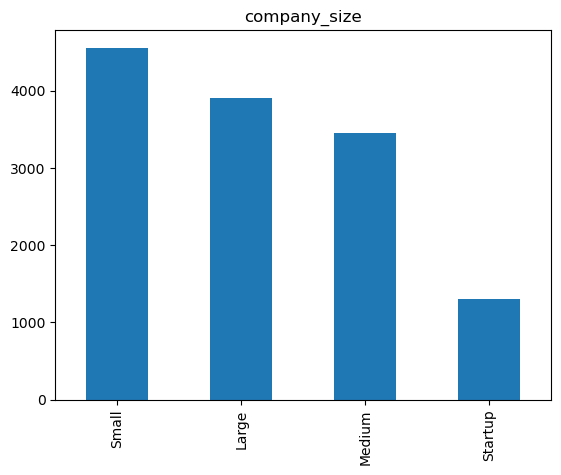

In [44]:

data["company_size"].value_counts().plot.bar(title="company_size") 
plt.savefig("graph4_image.png")
plt.show()

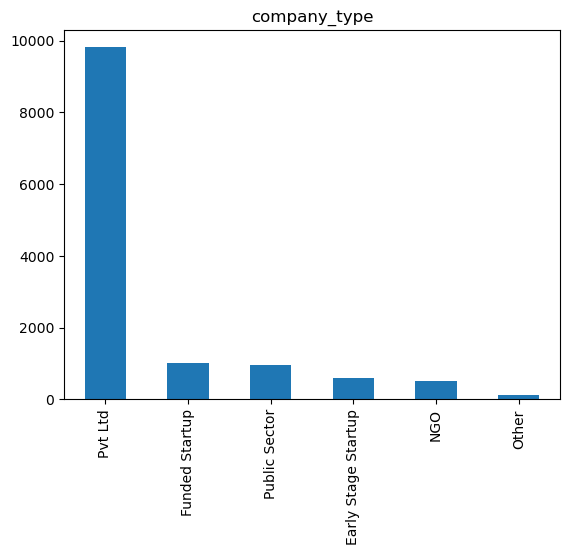

In [45]:
data["company_type"].value_counts().plot.bar(title="company_type") 
plt.savefig("graph3_image.png")
plt.show()

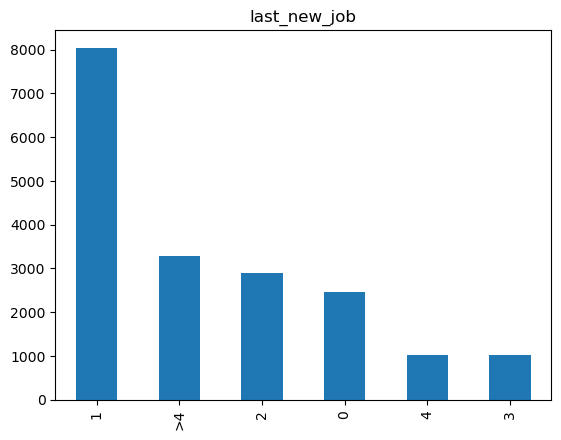

In [46]:
data["last_new_job"].value_counts().plot.bar(title="last_new_job") 
plt.savefig("graph2_image.png")
plt.show()

In [47]:
#BIVARIATE ANALYSIS

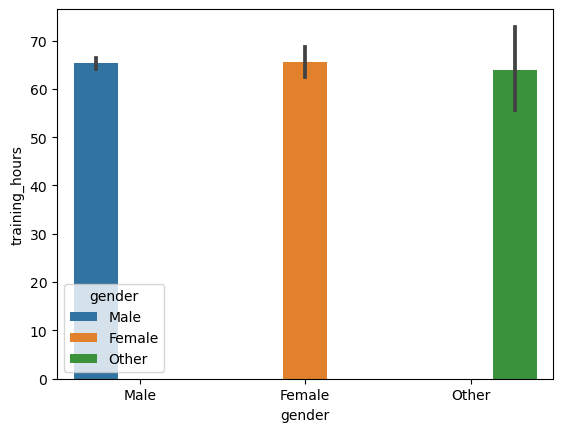

In [48]:

sns.barplot(data=data, x="gender", y="training_hours", hue="gender")
plt.savefig("graph0_image.png")
# 'hue' is used to visualize the data of different categories in one plot.

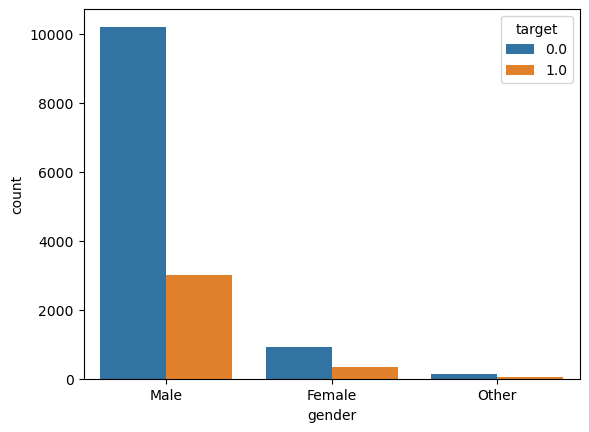

In [49]:
sns.countplot(data=data, x="gender", hue="target")
plt.savefig("gender_image1.png")

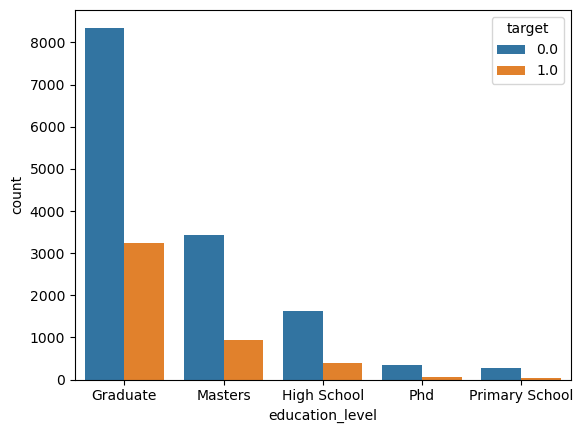

In [50]:
sns.countplot(data=data, x="education_level", hue="target")
plt.savefig("edu_image.png")

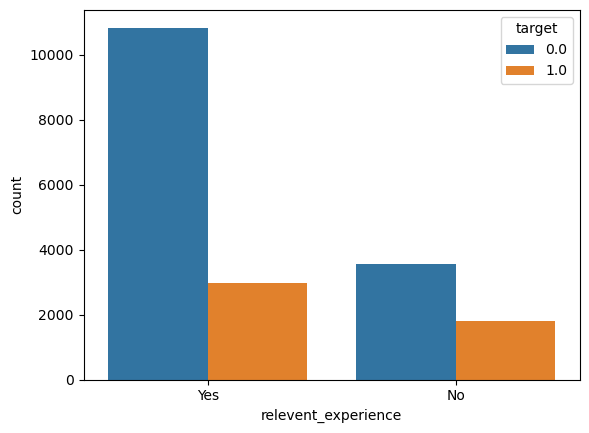

In [51]:
sns.countplot(data=data,x="relevent_experience",hue="target")
plt.savefig("rel_image.png")

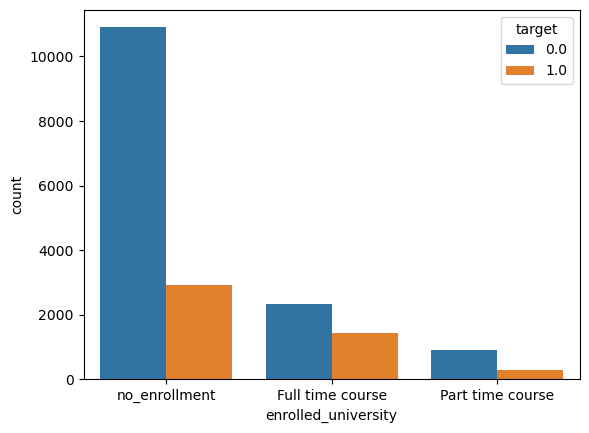

In [52]:
sns.countplot(data=data, x="enrolled_university",hue="target")
plt.savefig("uni_image.png")

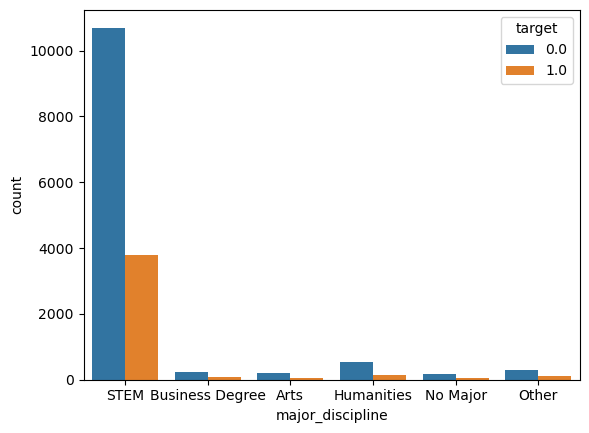

In [53]:
sns.countplot(data=data ,x="major_discipline" ,  hue="target")
plt.savefig("dis_image.png")

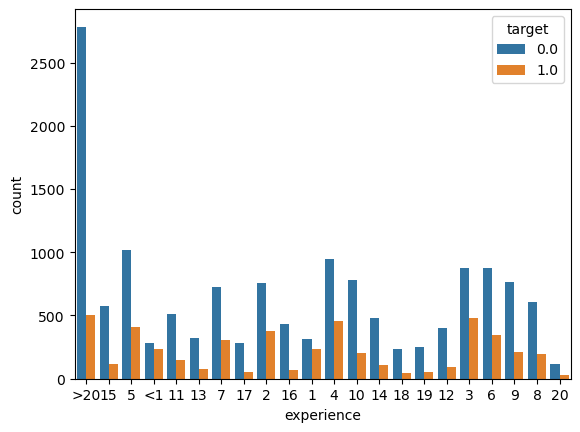

In [54]:
sns.countplot(data=data ,x="experience" ,  hue="target")
plt.savefig("exp_image.png")

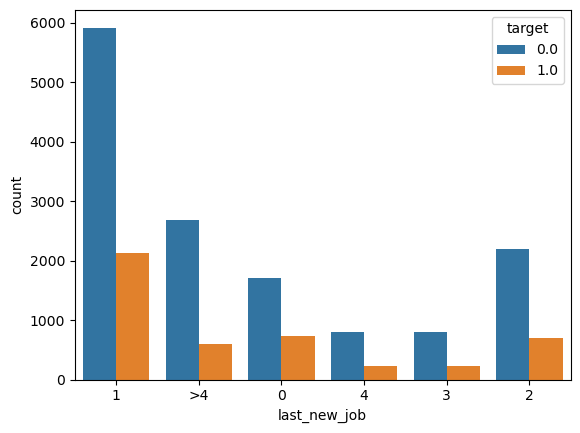

In [55]:
sns.countplot(data=data,x="last_new_job", hue="target")
plt.savefig("lastnew_image.png")

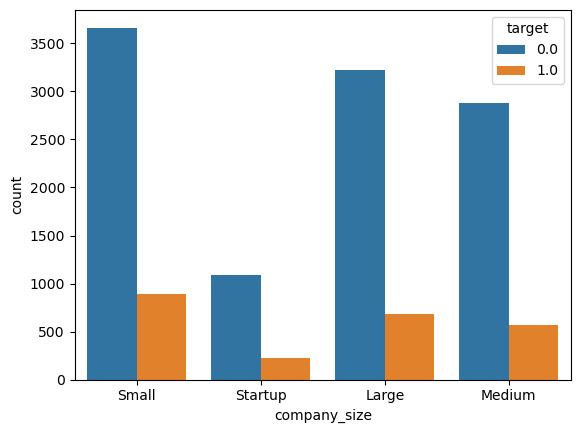

In [56]:

sns.countplot(data=data,x="company_size", hue="target")
plt.savefig("lastnew_image.png")

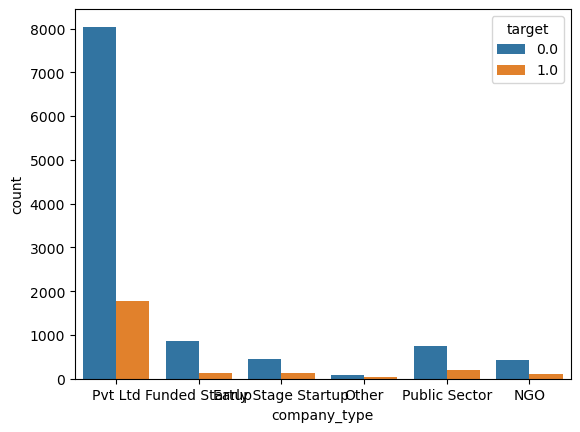

In [57]:

sns.countplot(data=data,x="company_type", hue="target")
plt.savefig("lastnew_image.png")

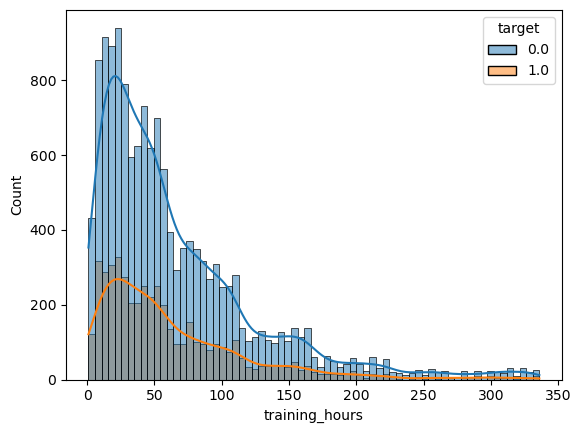

In [58]:
sns.histplot(data=data,x="training_hours", hue="target",kde=True )
plt.savefig("train_image.png")

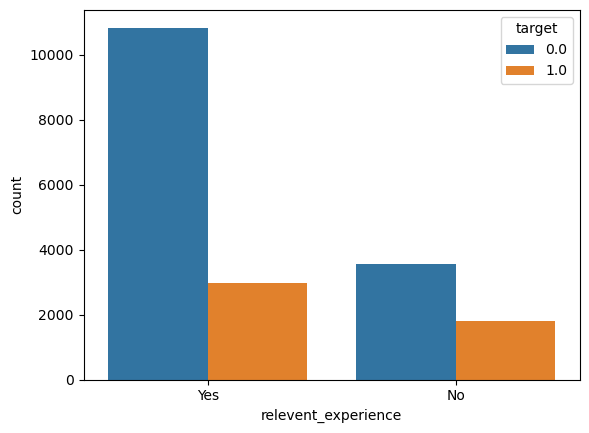

In [59]:
sns.countplot(data=data,x="relevent_experience", hue="target")
plt.savefig("rele_image.png")

**1.Data is imbalance as per target feature.**

**2.Company type, Gender, city, city development index & major discipline data is completely imbalanced & one sided hence it   will not consider this feature for training.**


C:\Users\skshe\AppData\Local\Temp\ipykernel_13588\194995594.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True,linewidths=0.1,annot_kws={"fontsize":6})


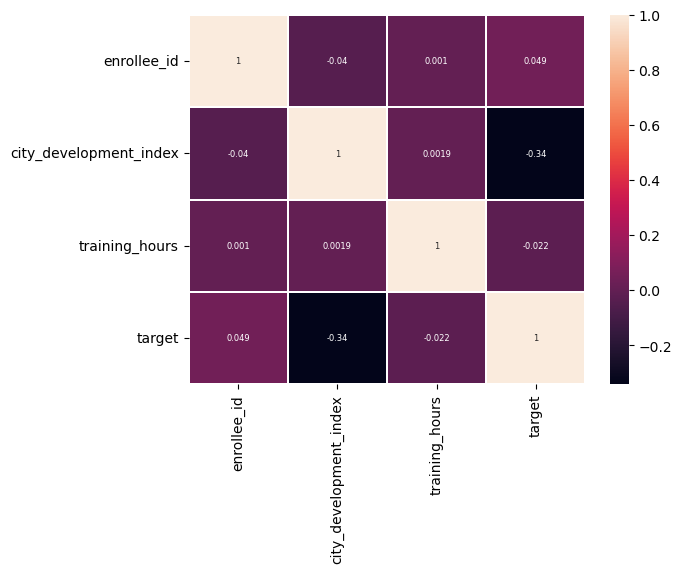

In [60]:
sns.heatmap(data.corr(),annot = True,linewidths=0.1,annot_kws={"fontsize":6})
plt.show()

In [61]:
#data = data.copy()
#data["experience"] = np.where(data["experience"]=="<1",1,data["experience"])
#data["experience"] = np.where(data["experience"]==">20",21,data["experience"])
#data["experience"] = data["experience"].astype(float)
#data["last_new_job"] = np.where(data["last_new_job"]=="never",0,data["last_new_job"])
#data["last_new_job"] = np.where(data["last_new_job"]==">4",5,data["last_new_job"])
#data["last_new_job"] = data["last_new_job"].astype(float)
#data.drop("enrollee_id",axis=1).corr("spearman")

In [62]:
#data["gender"]=data["gender"].fillna(data["gender"].ffill())
#data["company_size"].fillna(data["company_size"].mode()[0],inplace=True)
#data["company_type"].fillna(data["company_type"].mode()[0],inplace=True)
#data["enrolled_university"]=data["enrolled_university"].fillna(data["enrolled_university"].ffill())
#data["education_level"]=data["education_level"].fillna(data["education_level"].ffill())
#data["major_discipline"]=data["major_discipline"].fillna(data["major_discipline"].ffill())
#data["experience"]=data["experience"].fillna(data["experience"].ffill())
#data["last_new_job"]=data["last_new_job"].fillna(data["last_new_job"].ffill())

In [63]:
data["company_size"].fillna(value="not working yet",inplace=True)
data["company_type"].fillna(value="not working yet",inplace=True)

In [64]:
data["enrolled_university"].fillna(data["enrolled_university"].mode()[0],inplace=True)

In [66]:
data["education_level"].fillna(data["education_level"].mode()[0],inplace=True)

In [67]:
data["major_discipline"].fillna(data["major_discipline"].mode()[0],inplace =True)

In [68]:
data["experience"].fillna(data["experience"].mode()[0],inplace=True)

In [69]:
data["last_new_job"].fillna(data["last_new_job"].mode()[0],inplace=True)

In [95]:
data["gender"].fillna(data["gender"].mode()[0],inplace = True)

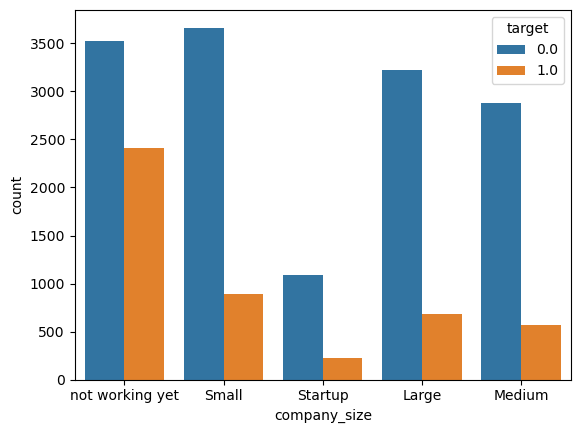

In [96]:
sns.countplot(data=data,x="company_size", hue="target")
plt.savefig("compsize_image.png")

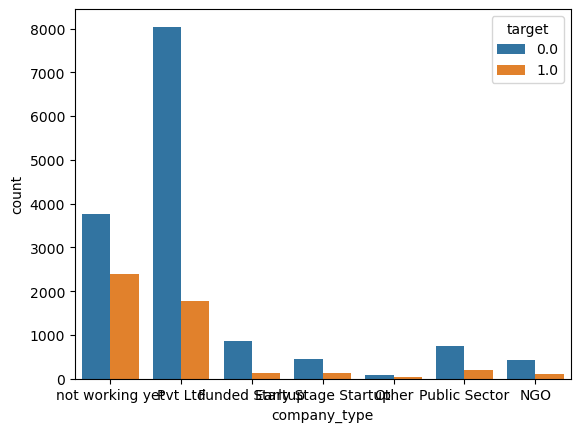

In [97]:
sns.countplot(data=data,x="company_type", hue="target")
plt.savefig("comptype_image.png")

In [98]:
data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

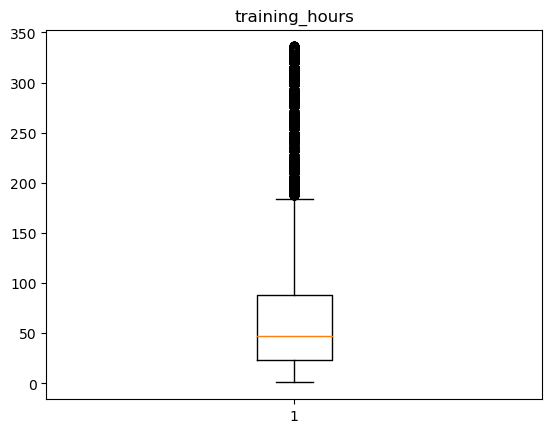

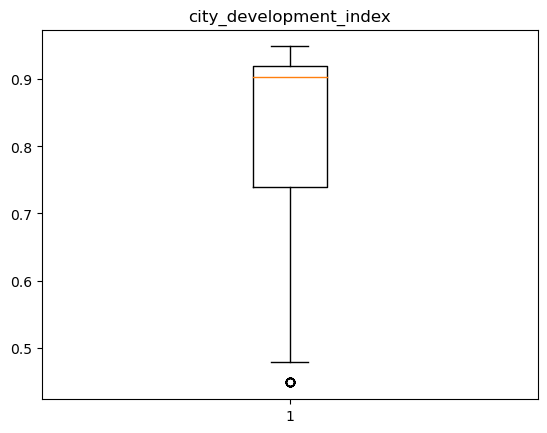

In [99]:
num_col = ["training_hours","city_development_index"]
for i in num_col:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

**from above the feature training hours and city development index has outliers, but removing such data can effect reliability and accuracy of data.**

In [100]:
train=data.drop(['enrollee_id',"city"],axis=1)
train

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Yes,no_enrollment,Graduate,STEM,>20,not working yet,not working yet,1,36,1.0
1,0.776,Male,No,no_enrollment,Graduate,STEM,15,Small,Pvt Ltd,>4,47,0.0
2,0.624,Male,No,Full time course,Graduate,STEM,5,not working yet,not working yet,0,83,0.0
3,0.789,Male,No,no_enrollment,Graduate,Business Degree,<1,not working yet,Pvt Ltd,0,52,1.0
4,0.767,Male,Yes,no_enrollment,Masters,STEM,>20,Small,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,Male,No,no_enrollment,Graduate,Humanities,14,not working yet,not working yet,1,42,1.0
19154,0.920,Male,Yes,no_enrollment,Graduate,STEM,14,not working yet,not working yet,4,52,1.0
19155,0.920,Male,Yes,no_enrollment,Graduate,STEM,>20,Small,Pvt Ltd,4,44,0.0
19156,0.802,Male,Yes,no_enrollment,High School,STEM,<1,Medium,Pvt Ltd,2,97,0.0


In [101]:
from sklearn.preprocessing import LabelEncoder

In [102]:
le= LabelEncoder()

In [103]:
train["relevent_experience"].unique()

array(['Yes', 'No'], dtype=object)

In [104]:
train["relevent_experience"] = le.fit_transform(train["relevent_experience"])

In [105]:
train["education_level"].unique()

array(['Graduate', 'Masters', 'High School', 'Phd', 'Primary School'],
      dtype=object)

In [106]:
train["education_level"] = le.fit_transform(train["education_level"])

In [107]:
train["experience"] = le.fit_transform(train["experience"])

In [108]:
train["company_size"] = le.fit_transform(train["company_size"])

In [109]:
train["last_new_job"] = le.fit_transform(train["last_new_job"])

In [110]:
train = pd.get_dummies(train)
train

,city_development_index,relevent_experience,education_level,experience,company_size,last_new_job,training_hours,target,gender_Female,gender_Male,...,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_not working yet
0,0.920,1,0,21,4,1,36,1.0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0.776,0,0,6,2,5,47,0.0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0.624,0,0,15,4,0,83,0.0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,0.789,0,0,20,4,0,52,1.0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0.767,1,2,21,2,4,8,0.0,0,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,0,0,5,4,1,42,1.0,0,1,...,0,0,0,0,0,0,0,0,0,1
19154,0.920,1,0,5,4,4,52,1.0,0,1,...,0,0,1,0,0,0,0,0,0,1
19155,0.920,1,0,21,2,4,44,0.0,0,1,...,0,0,1,0,0,0,0,0,1,0
19156,0.802,1,1,20,1,2,97,0.0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [111]:
train.shape

(19158, 27)

In [112]:
train.columns

Index(['city_development_index', 'relevent_experience', 'education_level',
       'experience', 'company_size', 'last_new_job', 'training_hours',
       'target', 'gender_Female', 'gender_Male', 'gender_Other',
       'enrolled_university_Full time course',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'major_discipline_Arts',
       'major_discipline_Business Degree', 'major_discipline_Humanities',
       'major_discipline_No Major', 'major_discipline_Other',
       'major_discipline_STEM', 'company_type_Early Stage Startup',
       'company_type_Funded Startup', 'company_type_NGO', 'company_type_Other',
       'company_type_Public Sector', 'company_type_Pvt Ltd',
       'company_type_not working yet'],
      dtype='object')

<Axes: >

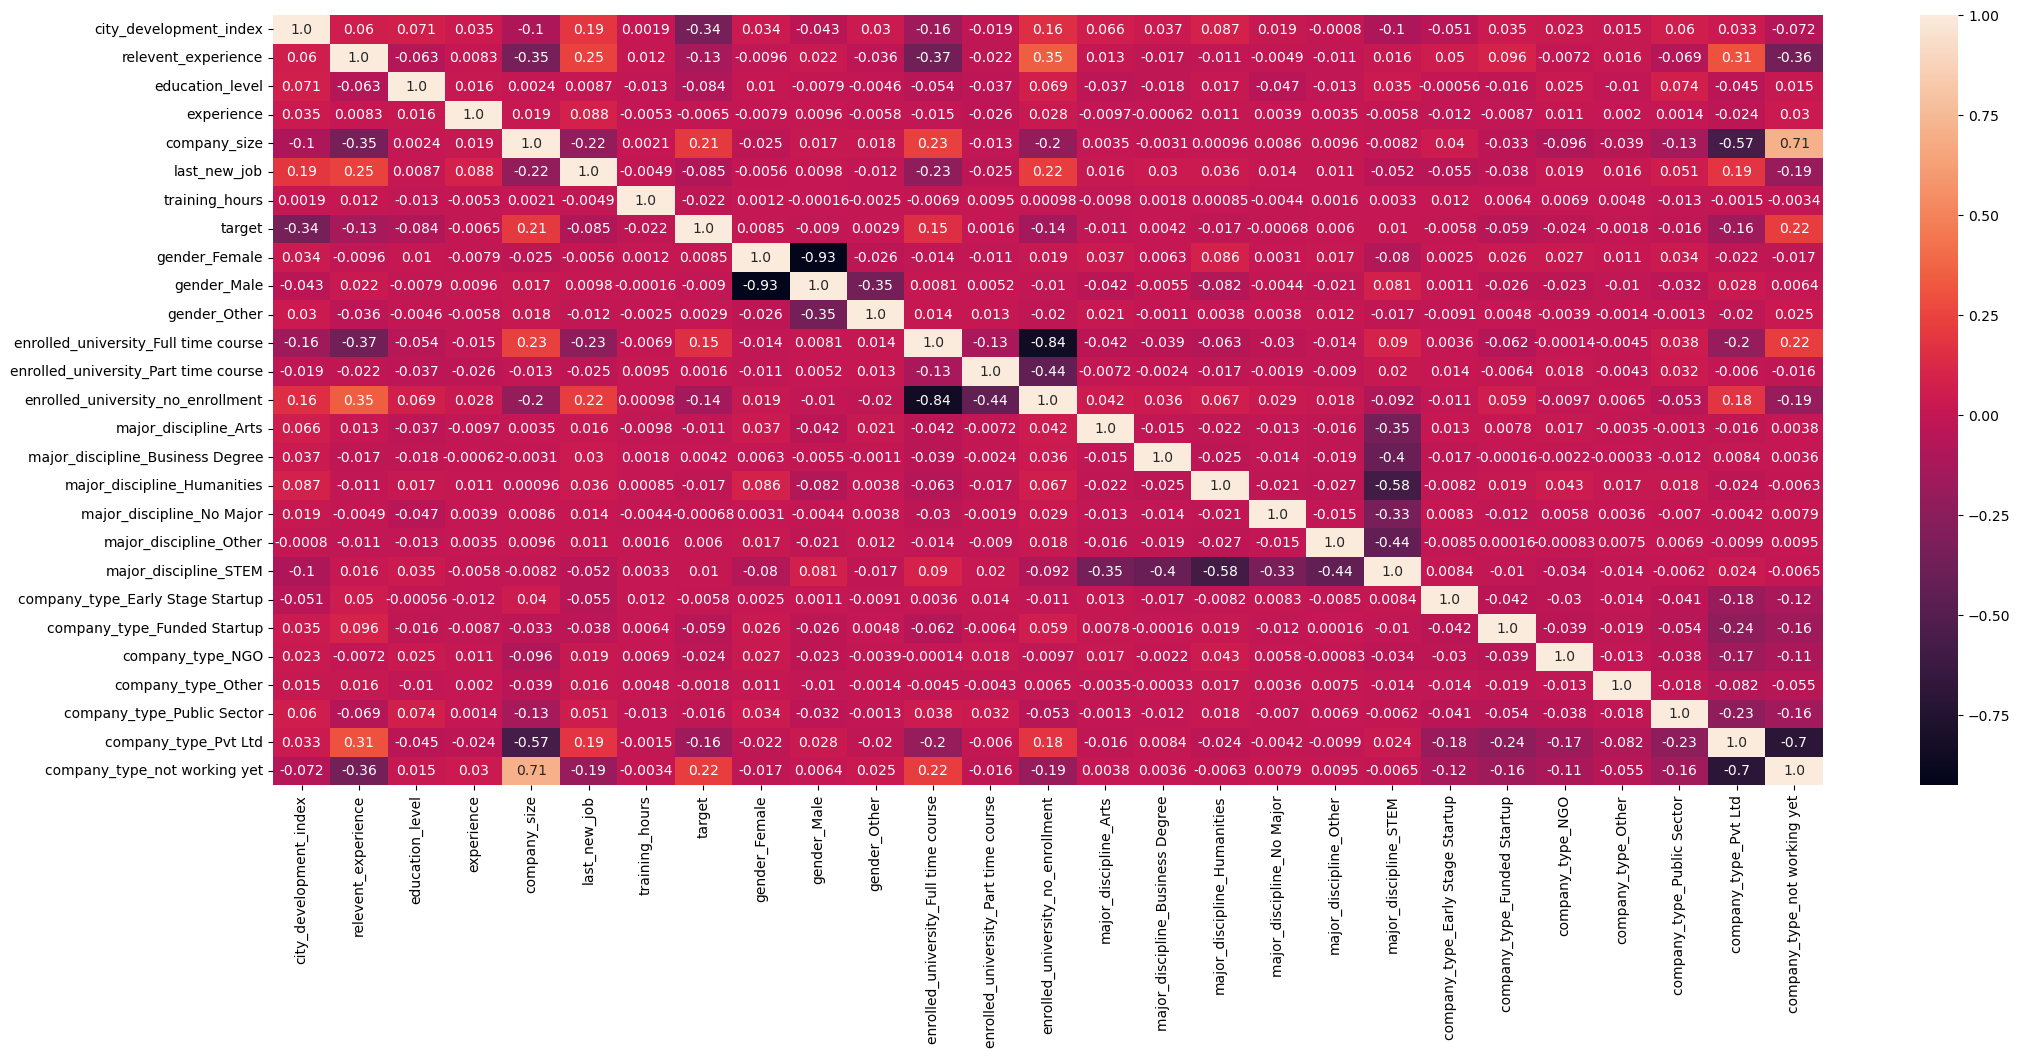

In [113]:
corr = train.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True,fmt='.2')

In [114]:
X = train.drop("target",axis=1)
Y = pd.DataFrame(train["target"])  

In [115]:
from imblearn.over_sampling import SMOTE

In [116]:

smote = SMOTE()
X,Y = smote.fit_resample(X,Y)

1.0    14381
0.0    14381
Name: target, dtype: int64


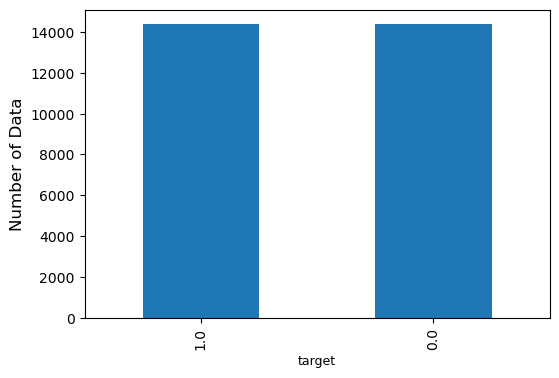

In [117]:
t = Y['target'].value_counts()  
plt.figure(figsize=(6,4))
#sns.barplot(t.values,alpha=0.8)
t.plot.bar()
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('target', fontsize=9)
plt.xticks(rotation=90)
print(t)
plt.show()


In [118]:
t

1.0    14381
0.0    14381
Name: target, dtype: int64

In [119]:
X.tail()


,city_development_index,relevent_experience,education_level,experience,company_size,last_new_job,training_hours,gender_Female,gender_Male,gender_Other,...,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_not working yet
28757,0.555193,0,1,14,4,0,64,0,1,0,...,0,0,1,0,0,0,0,0,0,0
28758,0.745837,0,0,13,2,1,150,0,0,0,...,0,0,1,0,0,0,0,0,0,0
28759,0.925891,0,0,20,0,1,113,0,0,0,...,0,0,0,0,0,0,0,0,1,0
28760,0.839532,0,0,20,4,1,44,0,1,0,...,0,0,1,0,0,0,0,0,0,1
28761,0.916641,0,0,21,4,2,27,0,1,0,...,0,0,1,0,0,0,0,0,0,1


# Load test dataset into python environment

In [85]:
test = pd.read_csv("aug_test.csv")

In [86]:
# Display the first few rows of the test dataset
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [87]:
# Display the last few rows of the test dataset
test.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84
2128,12215,city_102,0.804,Male,Has relevent experience,no_enrollment,Masters,STEM,15,10000+,Pvt Ltd,2,11


In [88]:
# checking shape of the test data
test.shape

(2129, 13)

In [89]:

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [90]:
test.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')

In [91]:
# basic descriptive statistics view for test data
test.describe()

,enrollee_id,city_development_index,training_hours
count,2129.000000,2129.000000,2129.000000
mean,16861.614843,0.824984,64.983091
std,9576.846029,0.125074,60.238660
min,3.000000,0.448000,1.000000
25%,8562.000000,0.698000,23.000000
50%,16816.000000,0.903000,47.000000
75%,25129.000000,0.920000,86.000000
max,33353.000000,0.949000,334.000000


In [92]:
#formatting company_size for better use and understanding.
test['company_size'].replace(['<10','10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+'],
                             ['Startup','Small','Small','Medium','Medium','Large','Large','Large'],inplace=True)

In [93]:
#formatting relevent_experience for better use and understanding.
test["relevent_experience"].replace(["Has relevent experience", "No relevent experience"],
                             ['Yes','No'],inplace=True)


In [94]:
#formatting last_new_job for better use and understanding.
test["last_new_job"].replace(["never"],["0"],inplace=True)

In [95]:
#Performing null value detection
test.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [96]:
#Performing forward filling and backward filling techniques.
test["gender"]=test["gender"].fillna(test["gender"].ffill())
test["company_size"].fillna(test["company_size"].mode()[0], inplace=True)
test["company_type"].fillna(test["company_type"].mode()[0],inplace = True)

In [97]:
test["enrolled_university"]=test["enrolled_university"].fillna(test["enrolled_university"].ffill())
test["education_level"]=test["education_level"].fillna(test["education_level"].ffill())
test["major_discipline"]=test["major_discipline"].fillna(test["major_discipline"].ffill())
test["experience"]=test["experience"].fillna(test["experience"].ffill())
test["last_new_job"]=test["last_new_job"].fillna(test["last_new_job"].ffill())

In [98]:
#test["gender"].fillna(test["gender"].mode()[0], inplace=True)
#test["enrolled_university"].fillna(test["enrolled_university"].mode()[0], inplace=True)
#test["education_level"].fillna(test["education_level"].mode()[0], inplace=True)
#test["major_discipline"].fillna(test["major_discipline"].mode()[0], inplace=True)
#test["experience"].fillna(test["experience"].mode()[0],inplace=True)
#test["company_size"].fillna(test["company_size"].mode()[0], inplace=True)
#test["company_type"].fillna(test["company_type"].mode()[0], inplace=True)
#test["last_new_job"].fillna(test["last_new_job"].mode()[0], inplace=True)

In [99]:
test.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64